# Scrapping web: API BCRA

*   Instalacion de librerias
*   Seleccion de indicadores
*   Creacion del Data Frame
*   Exportacion en Excel
*   Calculos a doc adicionales
*   Graficos



In [13]:
# Instalación de librerías necesarias
!pip install requests
!pip install pandas openpyxl

import requests
import pandas as pd

# Paso 1: Define tu clave API y los indicadores que deseas extraer

api_key = 'xxxxxxxxxx'  # <------------------------------------ Reemplaza con tu clave API
indicadores = ['usd_of', 'reservas', 'base', 'depositos']  # Lista de indicadores a extraer


"""
Ejemplos de variables:

Dólar oficial - usd
Dólar mayorista - usd_of
Dólar informal (blue) - usd_blue
Reservas internacionales - reservas
Base monetaria - base
Depósitos totales en pesos - depositos
Préstamos totales en pesos - prestamos
Tasa de interés de préstamos personales - tasasp
Tasa de interés de depósitos a plazo fijo para bancos (TM20) - tm20
Tasa de interés de préstamos hipotecarios - tasa_hipotecarios
Cuentas corrientes - cuentas_corrientes
Cajas de ahorro - cajas_ahorro
CER (Coeficiente de Estabilización de Referencia) - cer
UVA (Unidad de Valor Adquisitivo) - uva
UVI (Unidad de Vivienda) - uvi
Inflación mensual (IPC oficial) - inflacion_mensual_oficial
Devaluación del peso (mensual) - devaluacion
LELIQ (Letras de Liquidez) - leliq

"""

# Paso 2: Configura los headers con tu clave API
headers = {
    'Authorization': f'Bearer {api_key}'
}

# Paso 3: Crea un DataFrame vacío para combinar los resultados
df_final = pd.DataFrame()

# Paso 4: Itera sobre los indicadores y realiza la solicitud a la API
for indicador in indicadores:
    url = f"https://api.estadisticasbcra.com/{indicador}"
    print(f"Solicitando datos de: {url}")  # Verificar la URL

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()  # Convierte la respuesta en un diccionario de Python
        df_temp = pd.DataFrame(data)  # Convierte los datos en un DataFrame temporal

        # Paso 5: Renombra la columna de valor para saber de qué indicador es
        df_temp.rename(columns={'v': indicador}, inplace=True)

        # Paso 6: Si es la primera vez, establece 'd' como el índice, de lo contrario combina DataFrames
        if df_final.empty:
            df_final = df_temp
        else:
            df_final = pd.merge(df_final, df_temp, on='d', how='outer')  # Combina DataFrames por fecha ('d')
    else:
        print(f"Error en la solicitud del indicador {indicador}: {response.status_code}")

# Paso 7: Convierte la columna de fechas al formato DD/MM/AAAA
df_final['d'] = pd.to_datetime(df_final['d']).dt.strftime('%d/%m/%Y')

# Paso 8: Exporta el DataFrame combinado a un archivo Excel
df_final.to_excel('datos_bcra_multiple.xlsx', index=False)

print("Datos exportados a 'datos_bcra_multiple.xlsx'")

# Paso 9: Descarga el archivo Excel en Google Colab
from google.colab import files
files.download('datos_bcra_multiple.xlsx')


Solicitando datos de: https://api.estadisticasbcra.com/usd_of
Solicitando datos de: https://api.estadisticasbcra.com/reservas
Solicitando datos de: https://api.estadisticasbcra.com/base
Solicitando datos de: https://api.estadisticasbcra.com/depositos
Datos exportados a 'datos_bcra_multiple.xlsx'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Calculos adicionales

In [14]:
df_final['BM/Reservas'] = df_final['base'] / df_final['reservas']
df_final['(BM+Depositos)/Reservas'] = (df_final['base'] + df_final['depositos']) / df_final['reservas']

In [15]:
df_final

,d,usd_of,reservas,base,depositos,BM/Reservas,(BM+Depositos)/Reservas
0,02/01/1996,NaN,17314.0,13069.0,NaN,0.754823,NaN
1,03/01/1996,NaN,17404.0,12970.0,NaN,0.745231,NaN
2,04/01/1996,NaN,17435.0,13034.0,NaN,0.747577,NaN
3,05/01/1996,NaN,17609.0,13097.0,NaN,0.743767,NaN
4,08/01/1996,NaN,17674.0,13104.0,NaN,0.741428,NaN
...,...,...,...,...,...,...,...
6966,03/04/2024,861.25,27882.0,11604677.0,79465363.0,416.206764,3266.266408
6967,04/04/2024,861.75,28400.0,11600629.0,79884430.0,408.472852,3221.304894
6968,05/04/2024,862.75,28765.0,11744788.0,80072720.0,408.301338,3191.987068
6969,08/04/2024,864.25,NaN,NaN,NaN,NaN,NaN


#*Grafico estatico*

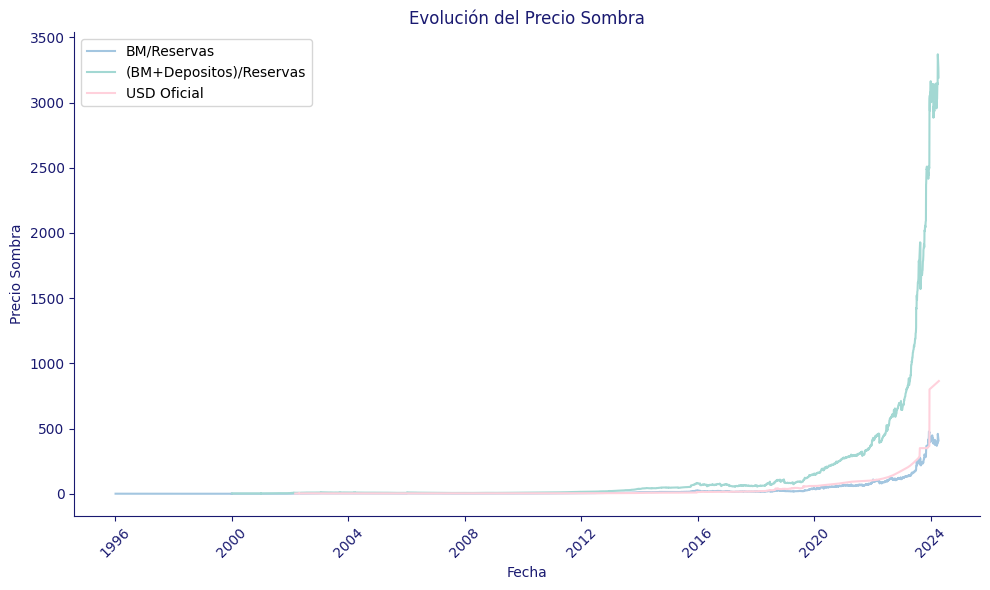

In [19]:
import matplotlib.pyplot as plt

# Convertir la columna 'd' a tipo datetime
df_final['d'] = pd.to_datetime(df_final['d'], format='%d/%m/%Y')

plt.figure(figsize=(10, 6))

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#191970')  # Eje x
plt.gca().spines['left'].set_color('#191970')    # Eje y
plt.gca().spines['top'].set_color('none')          # Quitar eje superior
plt.gca().spines['right'].set_color('none')        # Quitar eje derecho

# Cambiar el color de las etiquetas de los ticks
plt.tick_params(axis='x', colors='#191970')  # Etiquetas del eje x
plt.tick_params(axis='y', colors='#191970')  # Etiquetas del eje y

# Graficar sin marcadores (se elimina marker='o') y sin cuadricula (se comenta plt.grid)
plt.plot(df_final['d'], df_final['BM/Reservas'], linestyle='-', color='#A3C6E0', label='BM/Reservas')
plt.plot(df_final['d'], df_final['(BM+Depositos)/Reservas'], linestyle='-', color='#A3D8D3', label='(BM+Depositos)/Reservas')
plt.plot(df_final['d'], df_final['usd_of'], linestyle='-', color='#FFD1DC', label='USD Oficial')

plt.title("Evolución del Precio Sombra", color='#191970')
plt.xlabel("Fecha", color='#191970')
plt.ylabel("Precio Sombra", color='#191970')
plt.xticks(rotation=45)
# plt.grid(True)  # Se ha removido la cuadricula

# Agregar la leyenda
plt.legend(loc='best')

plt.tight_layout()
plt.show()

#*Grafico interactivo*

In [27]:
import plotly.graph_objects as go
import pandas as pd

# Asegurarse de que la columna de fechas sea de tipo datetime
df_final['d'] = pd.to_datetime(df_final['d'], format='%d/%m/%Y')

# Crear la figura
fig = go.Figure()

# Agregar cada traza (línea) al gráfico
fig.add_trace(go.Scatter(x=df_final['d'], y=df_final['BM/Reservas'], mode='lines', name='BM/Reservas', line=dict(color='#A3C6E0')))
fig.add_trace(go.Scatter(x=df_final['d'], y=df_final['(BM+Depositos)/Reservas'], mode='lines', name='(BM+Depositos)/Reservas', line=dict(color='#A3D8D3')))
fig.add_trace(go.Scatter(x=df_final['d'], y=df_final['usd_of'], mode='lines', name='USD Oficial', line=dict(color='#FFD1DC')))

# Personalizar el layout
fig.update_layout(
    title={
        'text': "Evolución del Precio Sombra",
        'y': 0.9,  # Ubicación del título
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    titlefont=dict(color='#191970'),  # Color del título
    xaxis_title="Fecha",
    yaxis_title="Precio Sombra",
    hovermode="x unified",  # Unificar hover para todas las series en una misma posición
    plot_bgcolor='white',   # Fondo blanco
    paper_bgcolor='white',  # Fondo blanco del "papel" o lienzo completo
    font=dict(color='#191970'),  # Color de las etiquetas generales

    # Personalizar la leyenda dentro del gráfico
    legend=dict(
        x=0.05,  # Posición horizontal de la leyenda
        y=0.95,  # Posición vertical de la leyenda
        bgcolor='rgba(255, 255, 255, 0.5)',  # Fondo semitransparente
        bordercolor='#191970',  # Color del borde de la leyenda
        borderwidth=1  # Ancho del borde de la leyenda
    )
)

# Configurar el formato y color de los ejes (igual que el título)
fig.update_xaxes(
    showgrid=False,  # Sin cuadricula
    showline=True,   # Mostrar eje
    linewidth=2,     # Ancho de la línea del eje
    linecolor='#191970',  # Color del eje
    titlefont=dict(color='#191970', size=14),  # Estilo del título del eje x
    tickfont=dict(color='#191970', size=12)  # Estilo de las etiquetas del eje x
)
fig.update_yaxes(
    showgrid=False,  # Sin cuadricula
    showline=True,   # Mostrar eje
    linewidth=2,     # Ancho de la línea del eje
    linecolor='#191970',  # Color del eje
    titlefont=dict(color='#191970', size=14),  # Estilo del título del eje y
    tickfont=dict(color='#191970', size=12)  # Estilo de las etiquetas del eje y
)

# Mostrar la figura interactiva
fig.show()+